# Les Bases de Tensorflow en Python

## Importation des packages

In [9]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
plt.style.use('ggplot')

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [127]:
len(x_train)

60000

In [128]:
len(x_test)

10000

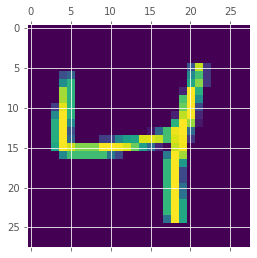

In [129]:
plt.matshow(x_train[2])

In [130]:
x_train[0].shape

(28, 28)

In [131]:
x_train.shape

(60000, 28, 28)

In [132]:
x_train = x_train/255
x_test = x_test/255

y_train = y_train/255
y_test = y_test/255

In [133]:
x_train_flattened = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flattened = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [134]:
x_train_flattened.shape

(60000, 784)

In [135]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

In [136]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [137]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0898 - accuracy: 0.0035
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0126 - accuracy: 0.0058
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0035 - accuracy: 0.0069
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0012 - accuracy: 0.0074
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.7597e-04 - accuracy: 0.0079


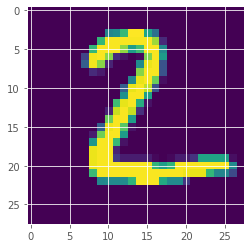

In [122]:
plt.imshow(x_test[1])

In [104]:
y_pred = model.predict(x_test_flattened);

In [105]:
y_pred[1]

array([1.0000000e+00, 3.3102168e-08, 8.1611262e-08, 7.2997800e-08,
       6.2105642e-08, 2.1792161e-07, 3.5601133e-08, 5.1149495e-08,
       5.6990796e-08, 6.2802530e-07], dtype=float32)

In [106]:
np.argmax(y_pred[5])

0